The image below shows a schematic of an actual commercial femtosecond laser resonator.

$M1$ and $M2$ are two spherical mirrors with focal length $f$ that are separated by a distance $2f + \delta$.

$M3$ and $M4$ are plane resonator end mirrors that are a distance $d_{1,2}$ from the spherical mirrors $(d_1 \ne d_2)$.

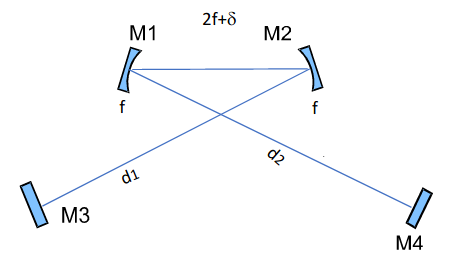

In [1]:
from IPython.display import Image
Image('Resonator.png')

Free propagation
$$ M_{fp} = \begin{pmatrix} 1 & d \\ 0 & 1 \end{pmatrix} $$

spherical Mirror
$$ M_{sm} = \begin{pmatrix} 1 & 0 \\ 2/R & 1 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ -1/f & 1 \end{pmatrix} $$

#### (i) Write down the ABCD matrix for a full cavity round-trip for general values of $f$, $\delta$ and $d_1$ and $d_2$.

In [2]:
from sympy import *
init_session()

IPython console for SymPy 1.10.1 (Python 3.10.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['notebook', 'science', 'grid'])

In [4]:
d1, d2, f, delta, lamda = symbols('d_1 d_2 f \delta \lambda', positive=True)
fl, d1l, d2l = 75, 750, 1000  # lengths of f, d1, d2
a, b, c, d = symbols('A B C D')

### Definition of transfer matrices.
---
Could have used pre-defined matrices from the sympy.physics.optics module.

In [5]:
Md1 = Matrix([[1, d1],
              [0, 1]])
Md2 = Matrix([[1, d2],
              [0, 1]])
M2f = Matrix([[1, 2*f + delta],
              [0, 1]])

In [6]:
M1 = Matrix([[1, 0],
             [-1/f, 1]])
M2 = Matrix([[1, 0],
             [-1/f, 1]])
M3 = Matrix([[1, 0],
             [0, 1]])
M4 = Matrix([[1, 0],
             [0, 1]])

### Calculation of transfer matrix of resonator
---

In [7]:
M = Md1*M2*M2f*M1*Md2*M4*Md2*M1*M2f*M2*Md1*M3  # M3 to M3

In [8]:
A = M[0].simplify()
B = M[1].simplify()
C = M[2].simplify()
D = M[3].simplify()

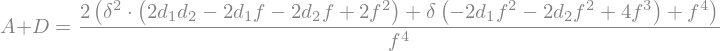

In [9]:
A_plus_D = (A + D).collect(delta)
Eq(a + d, A_plus_D)

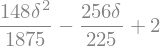

In [10]:
(A + D).subs({f: fl, d1: d1l, d2: d2l})

In [11]:
A_plus_Dfunc = lambdify([delta, f, d1, d2], A_plus_D, 'numpy')

### Caluclation of interval boundaries where |A + D| < 2
---

In [12]:
delta1, delta2, delta3 = np.array(solve(abs(A_plus_D.subs({f: fl, d1: d1l, d2: d2l})) - 2, delta), dtype=np.float64)

### Plot of |A + D| as a function of δ
---

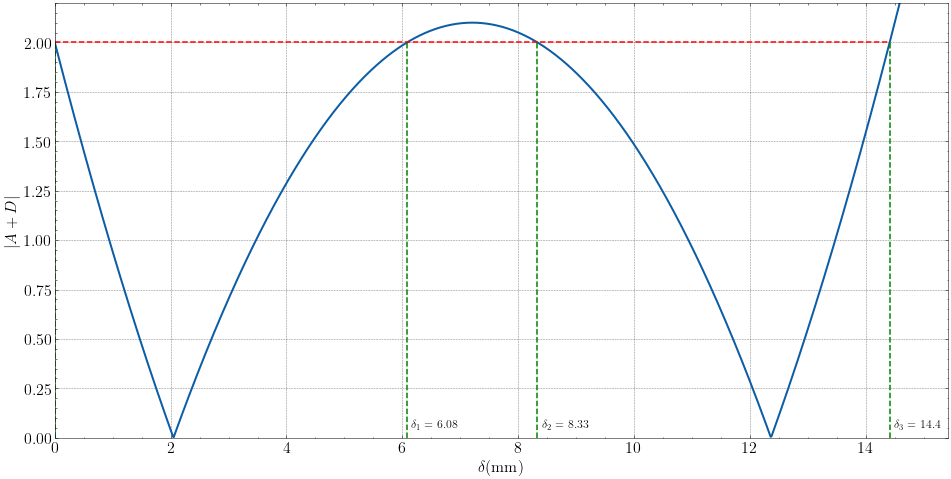

In [13]:
xx = np.linspace(0, delta3+1, 1000)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(xx, abs(A_plus_Dfunc(xx, fl, d1l, d2l)), lw=2)
ax.set(xlim=(-0.0, delta3+1), ylim=(-0., 2.2), ylabel=r'$|A + D|$', xlabel=r'$\delta (\mathrm{mm})$')
plt.hlines(2,0,delta3, colors='r', linestyles='dashed', lw=1.5)
plt.vlines(0, 0, 2, colors='g', linestyles='dashed', lw=1.5)
plt.vlines(delta1, 0, 2, colors='g', linestyles='dashed', lw=1.5)
plt.vlines(delta2, 0, 2, colors='g', linestyles='dashed', lw=1.5)
plt.vlines(delta3, 0, 2, colors='g', linestyles='dashed', lw=1.5)
ax.text(delta1+0.075, 0.05, f'$\delta_1 = {delta1:.3}$', fontsize=12) 
ax.text(delta2+0.075, 0.05, f'$\delta_2 = {delta2:.3}$', fontsize=12) 
ax.text(delta3+0.075, 0.05, f'$\delta_3 = {delta3:.3}$', fontsize=12) 
plt.savefig('images/PHYS3010-Assignment3-figure1.png')
plt.show()

### Plot of diameter of fundamental Gaussian mode at M3
---
$$ z_0 = \frac{\sqrt{4 - (A + D)^2}}{2 |C|} = \sqrt{\frac{4 - (A + D)^2}{4 C^2}} $$

In [14]:
z0 = sqrt((4 - (A + D)**2)/(4*(C**2))).simplify()

$$ w_0^2 = \frac{\lambda z_0}{\pi} $$

In [15]:
w0 = sqrt(lamda*z0/pi).simplify()
w0func = lambdify([delta, f, d1, d2, lamda], w0, 'numpy')

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in true_divide
  return (1/2)*sqrt(2)*sqrt(Dummy_35)*((f**8 - (2*Dummy_36**2*d_1*d_2 - 2*Dummy_36**2*d_1*f - 2*Dummy_36**2*d_2*f + 2*Dummy_36**2*f**2 - 2*Dummy_36*d_1*f**2 - 2*Dummy_36*d_2*f**2 + 4*Dummy_36*f**3 + f**4)**2)/(-Dummy_36*d_2 + Dummy_36*f + f**2)**2)**(1/4)/(sqrt(pi)*sqrt(Dummy_36))


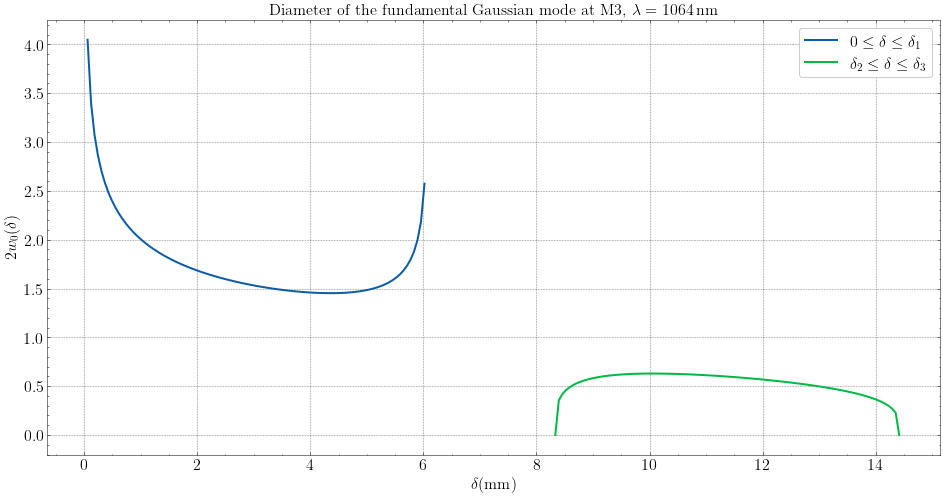

In [16]:
x1 = np.linspace(0., delta1, 100)  # plotting over the entire interval leads to division by 0 at both interval boundaries
x2 = np.linspace(delta2, delta3, 100)
lamdal=1064e-6
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(x1, 2*w0func(x1, fl, d1l, d2l, lamdal), lw=2, label=r'$0 \leq \delta \leq \delta_1$')
ax.plot(x2, 2*w0func(x2, fl, d1l, d2l, lamdal), lw=2, label=r'$\delta_2 \leq \delta \leq \delta_3$')
ax.set(xlabel=r'$\delta (\mathrm{mm})$', ylabel=r'$2 w_0(\delta)$', title=r"Diameter of the fundamental Gaussian mode at M3, $\lambda = 1064\,\mathrm{nm}$" )
plt.legend(loc='best')
plt.savefig('images/PHYS3010-Assignment3-figure2.png')
plt.show()

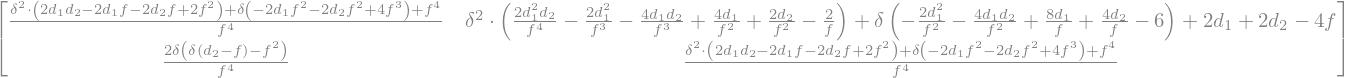

In [17]:
Matrix([[A.collect(delta), B.collect(delta)], 
        [C.collect(delta), D.collect(delta)]])
